In [127]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [128]:
df=pd.read_csv("income.csv")

In [129]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [130]:
from sklearn.cluster import KMeans

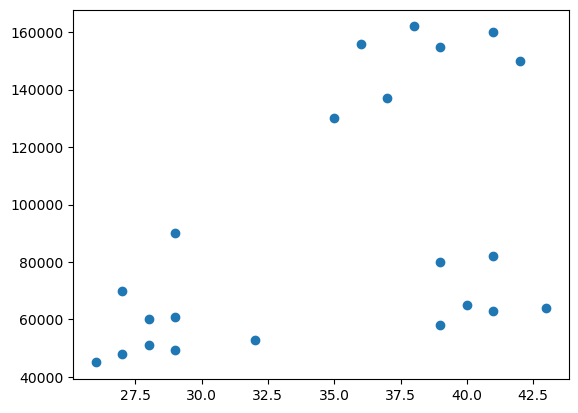

In [131]:
plt.scatter(df.Age,df["Income($)"])

In [132]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [133]:
x=km.fit_predict(df[["Age","Income($)"]])
x

C:\Users\NANI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NANI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [134]:
df['cluster']=x
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


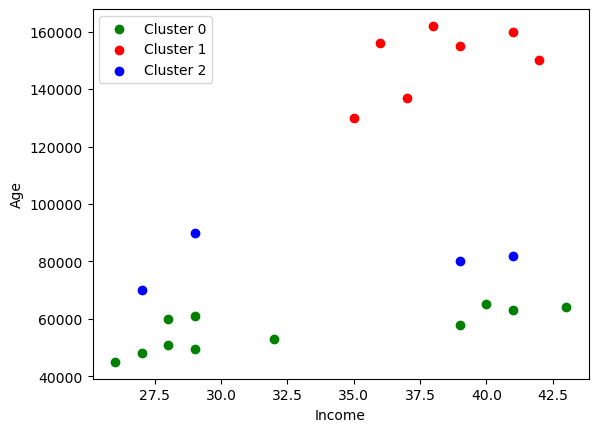

In [135]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='g',label='Cluster 0')
plt.scatter(df2.Age,df2['Income($)'],color='r',label='Cluster 1')
plt.scatter(df3.Age,df3['Income($)'],color='b',label='Cluster 2')
plt.xlabel("Income")
plt.ylabel('Age')
plt.legend()


In [136]:
scalar=MinMaxScaler()
x=scalar.fit(df[["Income($)"]])
df["Income($)"]=scalar.transform(df[["Income($)"]])

df.Age=scalar.fit_transform(df[["Age"]])
#print(x)

In [137]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [138]:
km=KMeans(n_clusters=3)
y_pre=km.fit_predict(df[['Age','Income($)']])
y_pre

C:\Users\NANI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NANI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [139]:
x=df[['Age','Income($)']]
x.dtypes

Age          float64
Income($)    float64
dtype: object

In [141]:
df['Cluster']=y_pre
df.drop('cluster',axis=1,inplace=True)
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


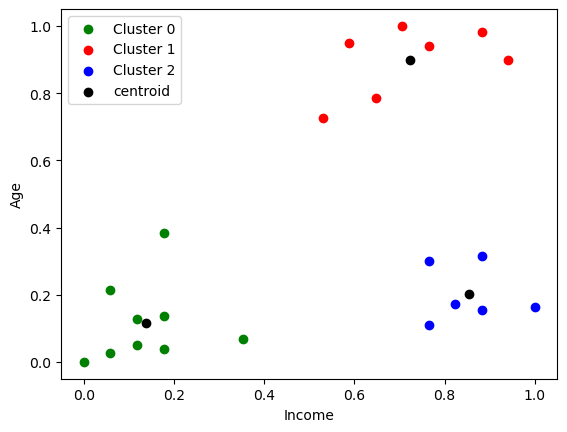

In [147]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='g',label='Cluster 0')
plt.scatter(df2.Age,df2['Income($)'],color='r',label='Cluster 1')
plt.scatter(df3.Age,df3['Income($)'],color='b',label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='o',label="centroid",color='black')
plt.xlabel("Income")
plt.ylabel('Age')
plt.legend()


In [154]:
km.cluster_centers_
import os

os.environ["OMP_NUM_THREADS"] = "1"


In [155]:
k_range=range(1,20)
sse=[]
for i in k_range:
    km=KMeans(n_clusters=i,n_init=10)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\NANI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NANI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NANI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NANI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

In [156]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2664030124668416,
 0.21055478995472496,
 0.17681044133887716,
 0.13706529523670868,
 0.10188787724979426,
 0.08139933135681814,
 0.0615335967142225,
 0.046811684349391744,
 0.03810151092446364,
 0.031034992989344867,
 0.02409144904819644,
 0.01641649105272562,
 0.011033819491365381,
 0.007513957485122411,
 0.0054551225809321684]

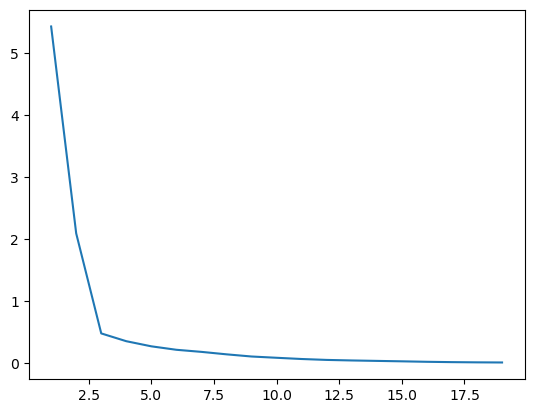

In [157]:
plt.plot(k_range,sse)